In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SupplyChain_dataset_cleaned.csv')

In [3]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,Delivered as per schedule,73,Sporting Goods,Caguas,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,0,Feb/03/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,Late Delivery,73,Sporting Goods,Caguas,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,0,Jan/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,Delivered as per schedule,73,Sporting Goods,San Jose,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,0,Jan/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,Delivered as per schedule,73,Sporting Goods,Los Angeles,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,0,Jan/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,Delivered as per schedule,73,Sporting Goods,Caguas,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,0,Jan/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  object 
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Segment               180519 non-null  object 
 12  Customer State                

**Exploratory Data Analysis

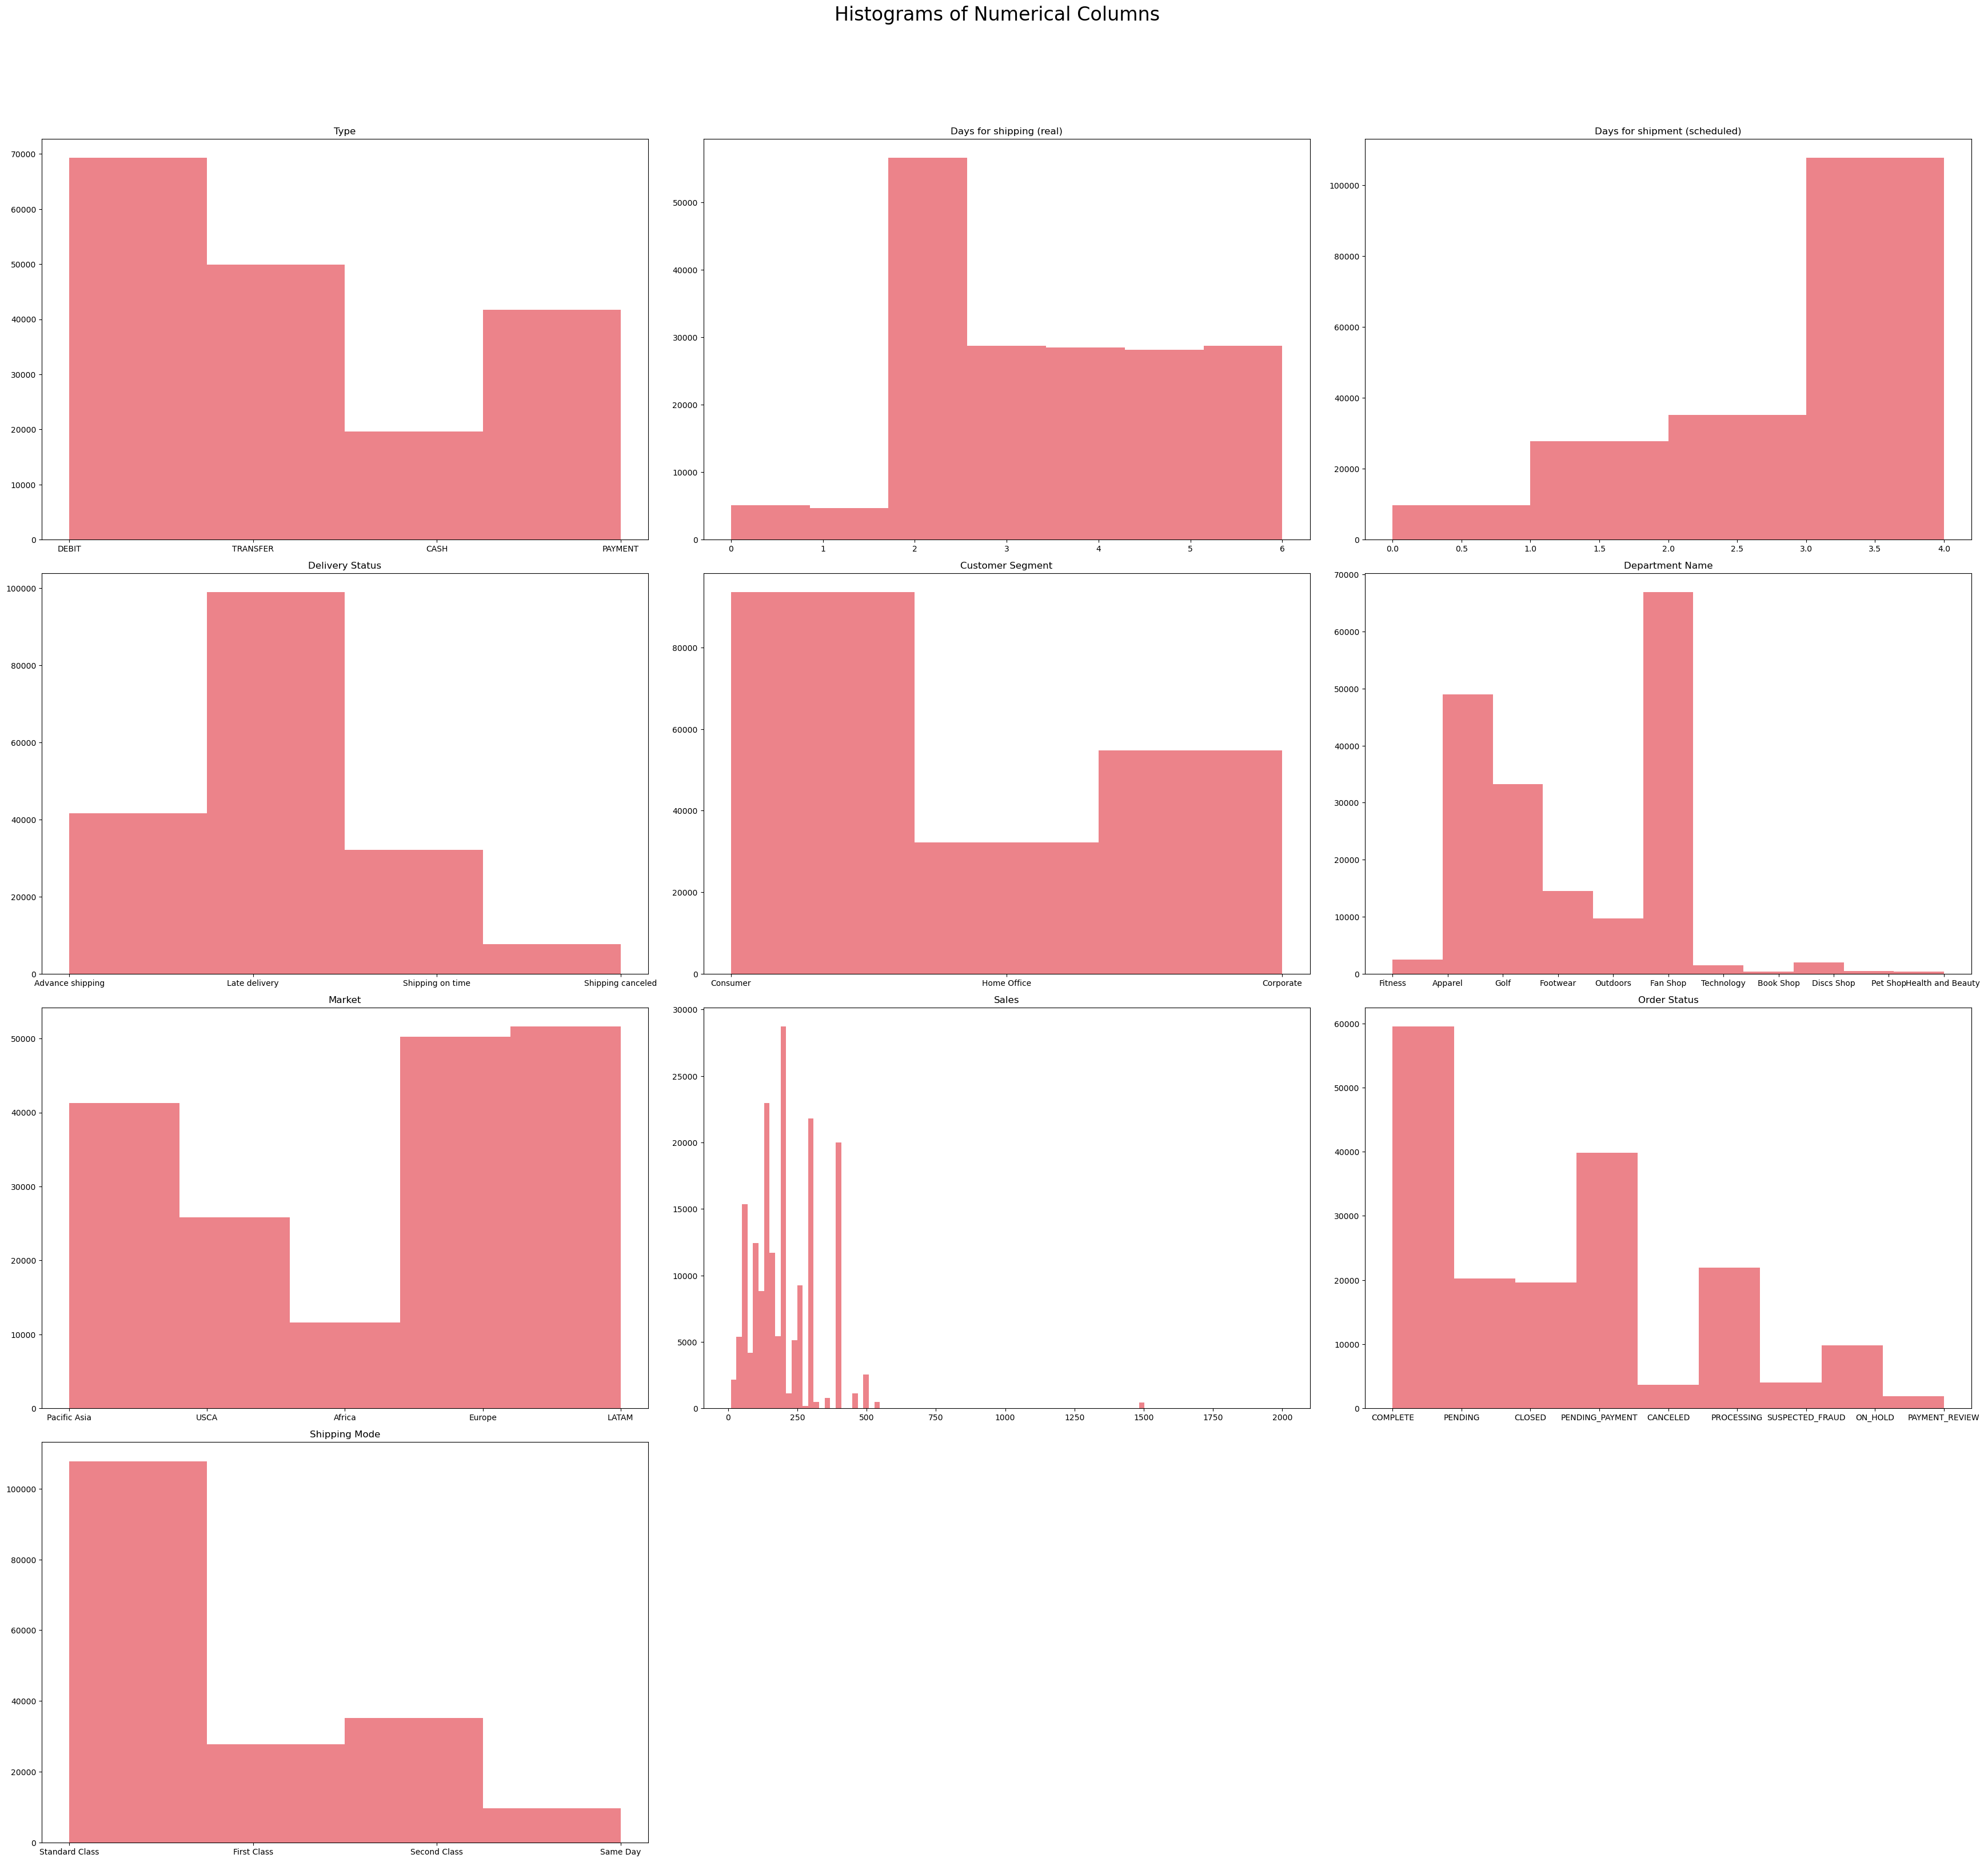

In [5]:
# Select subset of columns from the dataframe
selected_columns = df[['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Delivery Status',
       'Customer Segment', 'Department Name', 'Market',
        'Sales', 'Order Status','Shipping Mode']]

# Set up the figure and title for the histograms
fig = plt.figure(figsize=(35, 50))
plt.suptitle('Histograms of Numerical Columns', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

# Loop over each column and create a histogram
for i, column_name in enumerate(selected_columns.columns):
    # Set up the subplot for the histogram
    plt.subplot(6, 3, i + 1)
    current_subplot = plt.gca()
    current_subplot.set_title(column_name)

    # Determine the number of bins to use in the histogram
    unique_values = np.size(selected_columns.iloc[:, i].unique())
    if unique_values >= 100:
        num_bins = 100
    else:
        num_bins = unique_values
    
    # Create the histogram using the selected number of bins
    plt.hist(selected_columns.iloc[:, i], bins=num_bins, color='#ec838a')

# Adjust the layout of the subplots to improve readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the histogram plot
plt.show()

**Correlation Matrix

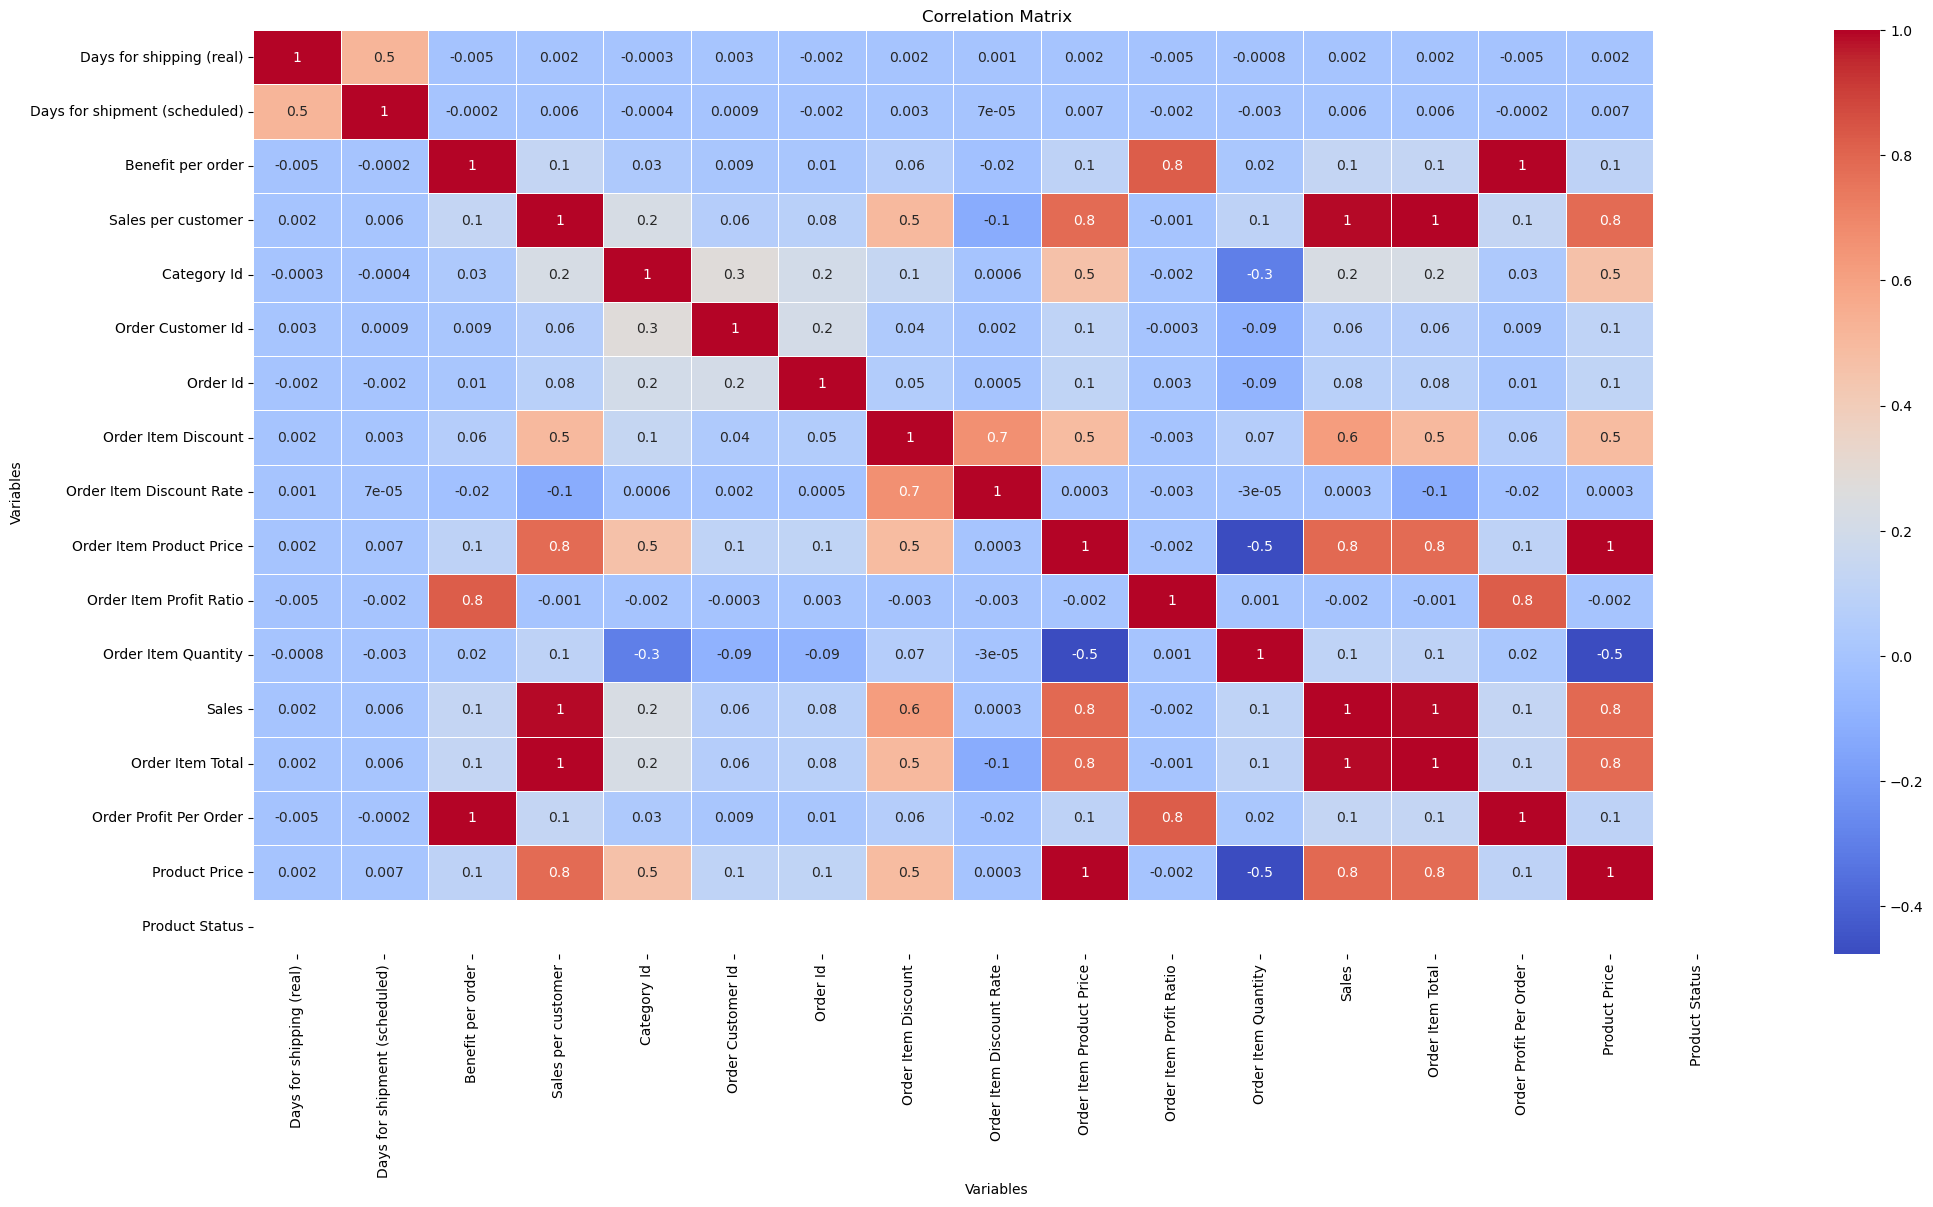

In [6]:
fig, ax = plt.subplots(figsize=(24, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.1g',cmap='coolwarm')
ax.set_title('Correlation Matrix')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')
plt.show()

In [ ]:
df["Order Status"].unique()

**Order analysis to determine large volumes of sales: 

The goal of this study is to measure the sales volume for various markets and how delivery status influences sales. It also determines how long it takes for orders to arrive at their destination, which aids in determining the optimal delivery alternatives for markets.

In [7]:
order= df[['Market', 'Sales','Order Region', 'Days for shipping (real)', 'Delivery Status']]
condition= order.groupby(['Order Region']).agg({'Sales': 'sum', 'Days for shipping (real)': 'mean'})

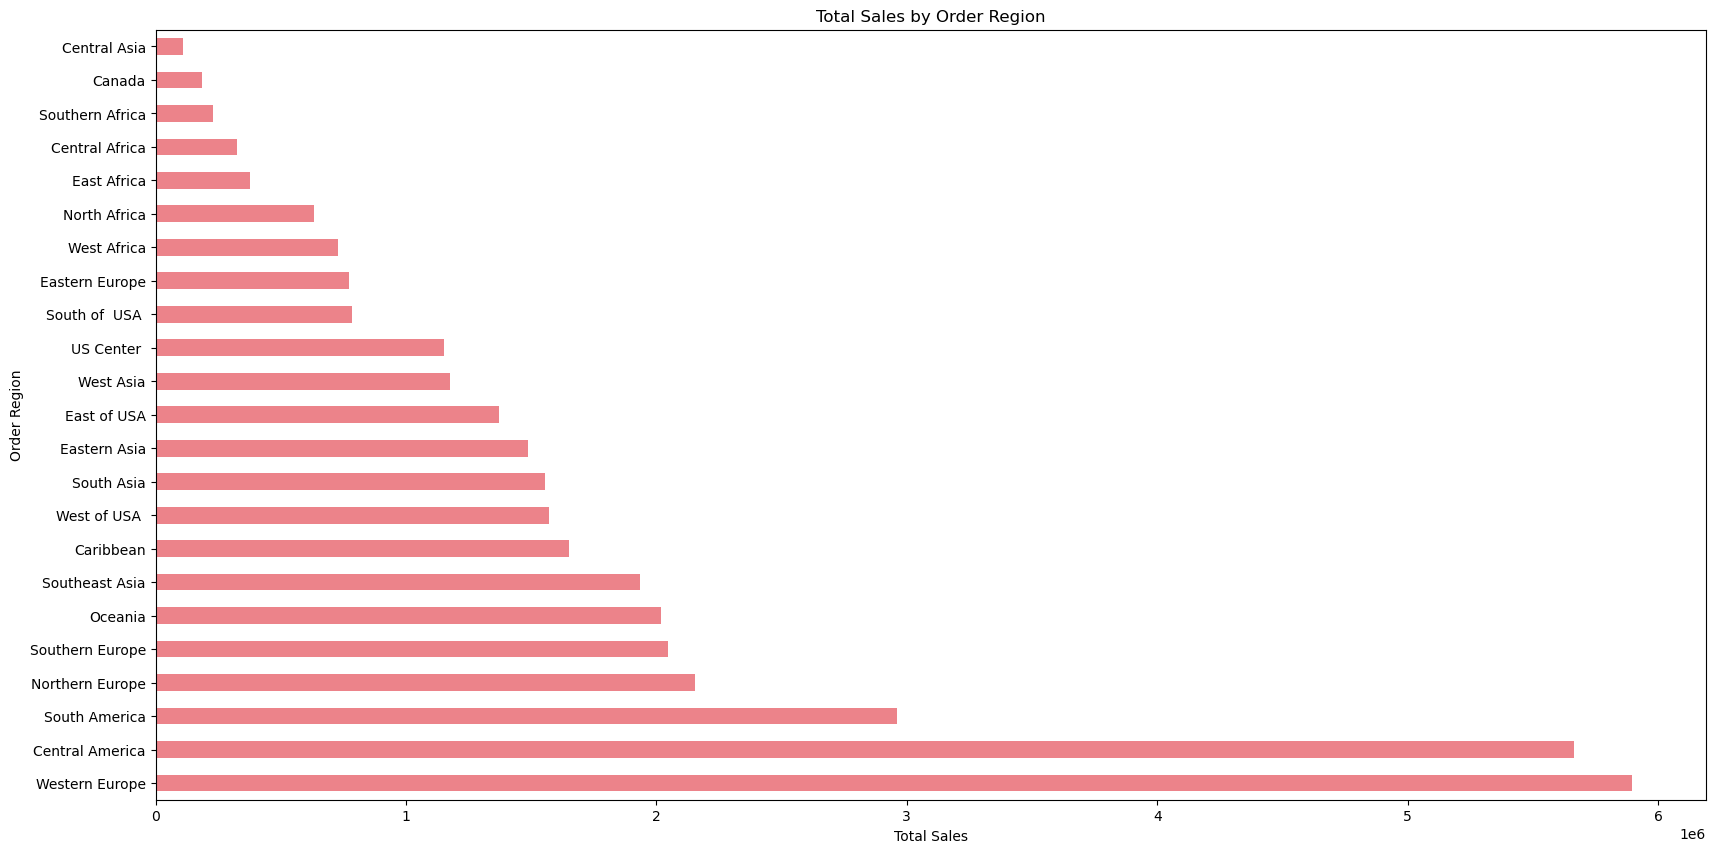

In [8]:
# total sales by Order Region

plt.figure(figsize=(20,10))
condition['Sales'].sort_values(ascending=False).plot(kind='barh', color='#ec838a')
plt.title('Total Sales by Order Region')
plt.xlabel('Total Sales')
plt.ylabel('Order Region')
plt.show()

**Market-based delivery status

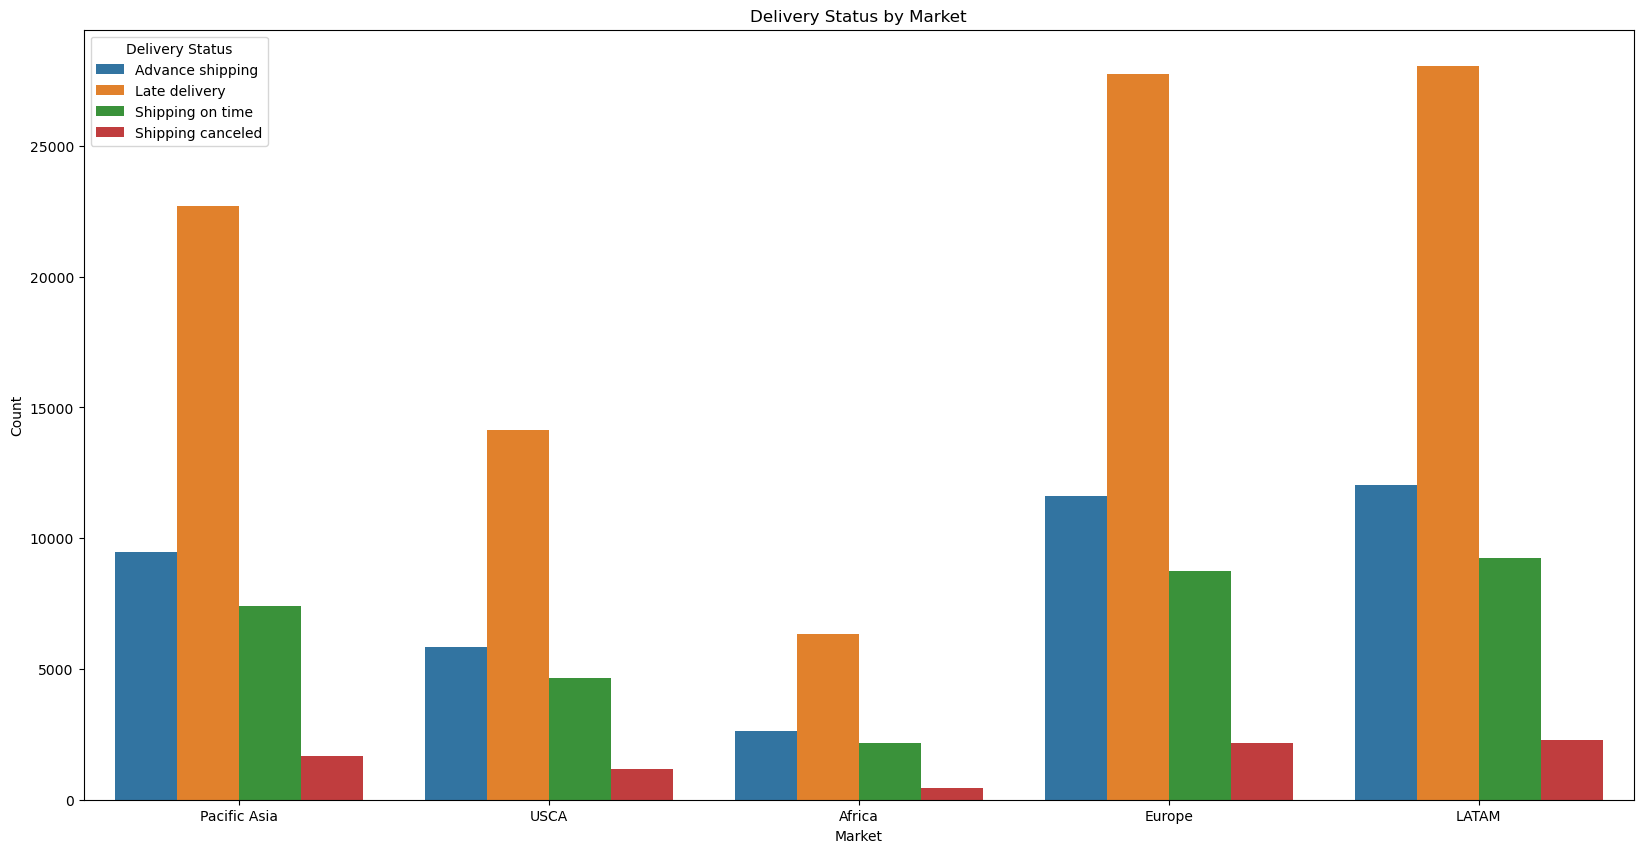

In [10]:
condition= order.groupby(['Market']).agg({'Sales': 'sum', 'Days for shipping (real)': 'mean'})
plt.figure(figsize=(20,10))
sns.countplot(x='Market', hue='Delivery Status', data=order)
plt.title('Delivery Status by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.show()


**Analysing which year had the highest amount of sales based on market

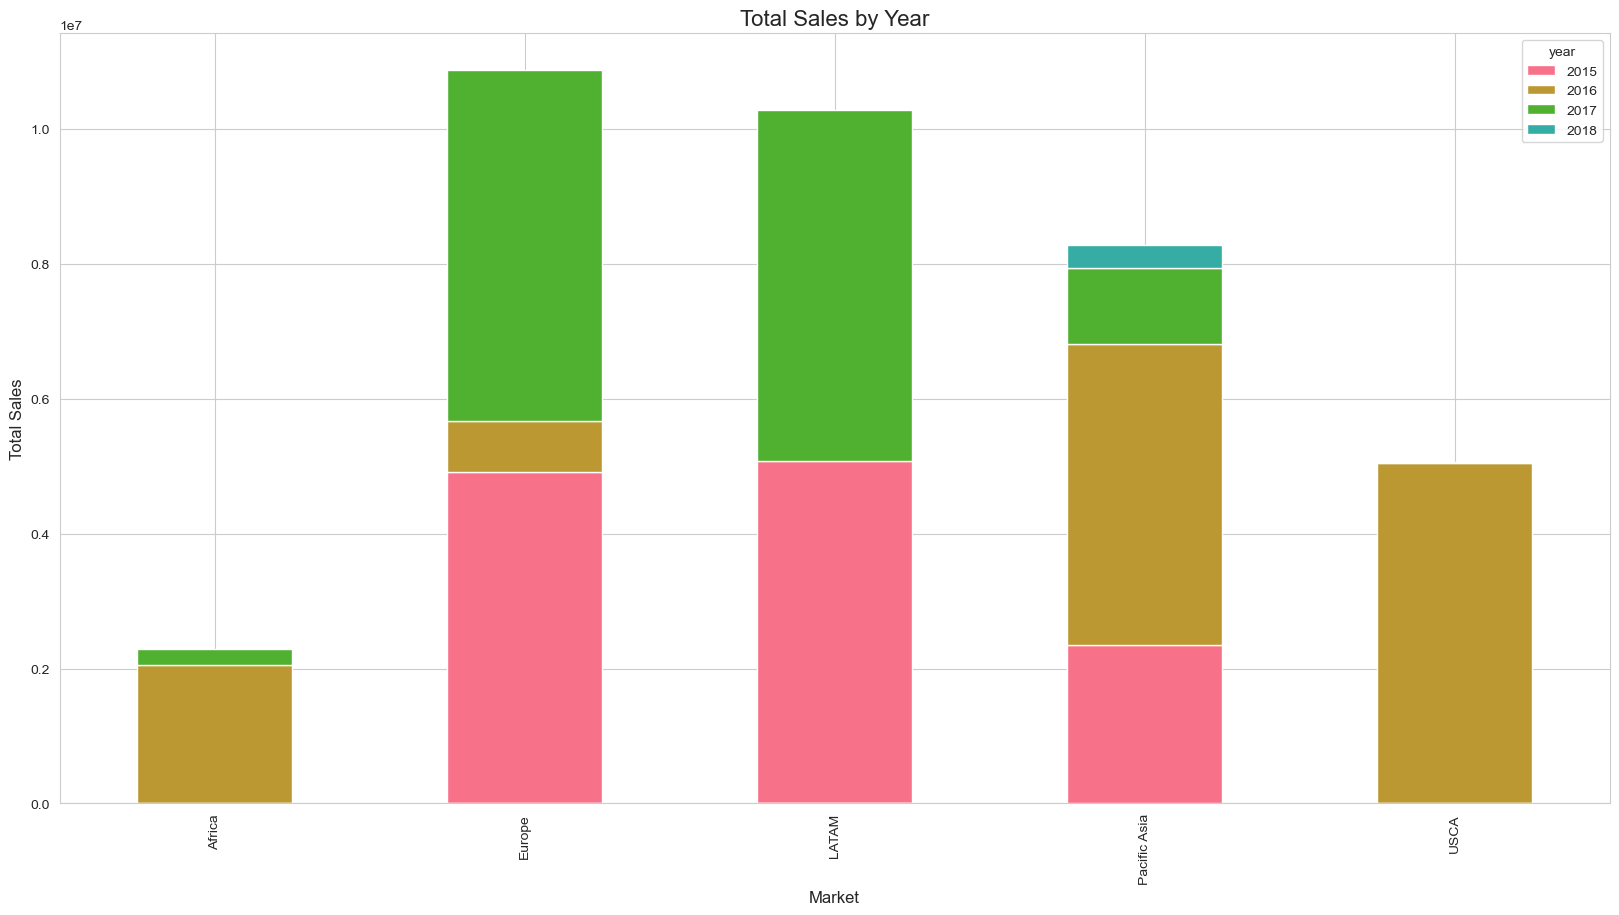

In [31]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Extract the year from the "order date (DateOrders)" column
df['year'] = df['order date (DateOrders)'].dt.year

# Group the data by market and year and calculate the total sales for each group
condition = df.groupby(['Market', 'year'])['Sales'].sum().unstack()

# Plot a stacked bar chart to visualize the results
condition.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  object        
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

**Top ten most loyal customers in terms of total sales

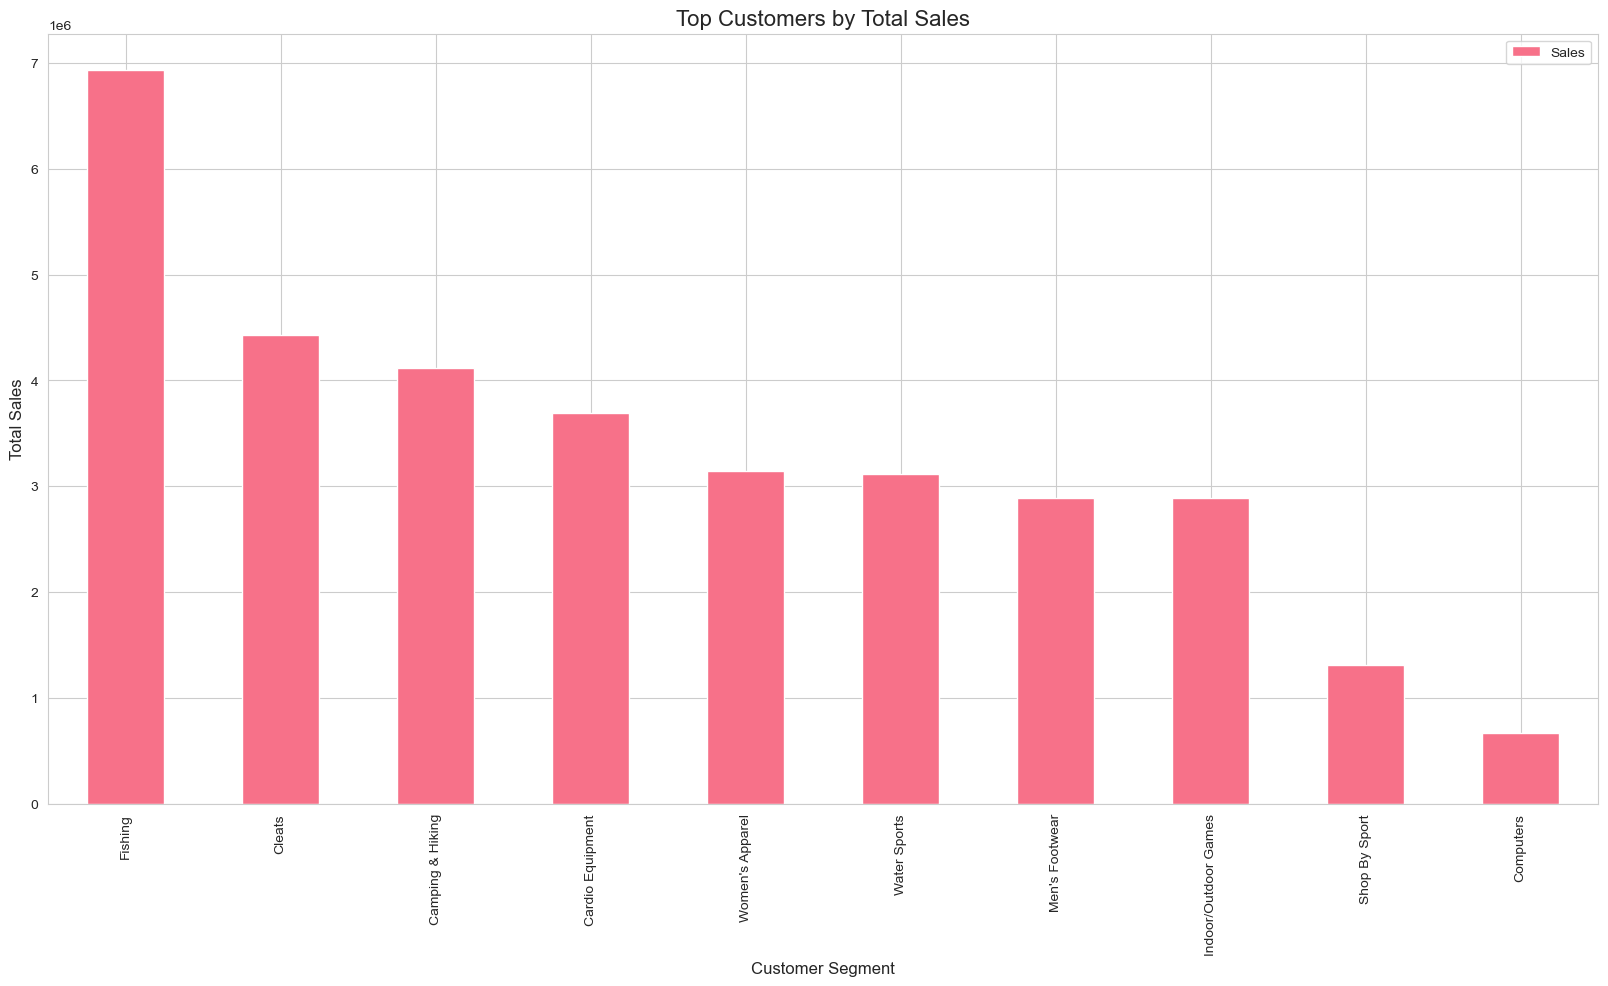

In [28]:
# Create a pivot table to calculate the total sales for each customer
customer_analysis = pd.pivot_table(df, values='Sales', index='Customer Segment', aggfunc='sum')

# Sort the pivot table in descending order by sales
top_customers = customer_sales.sort_values(by='Sales', ascending=False).head(10)

# Plot the pivot table as a bar chart
top_customers.plot(kind='bar', figsize=(20, 10))
plt.title('Top Customers by Total Sales', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()


**Customer analysis based on total regional sales

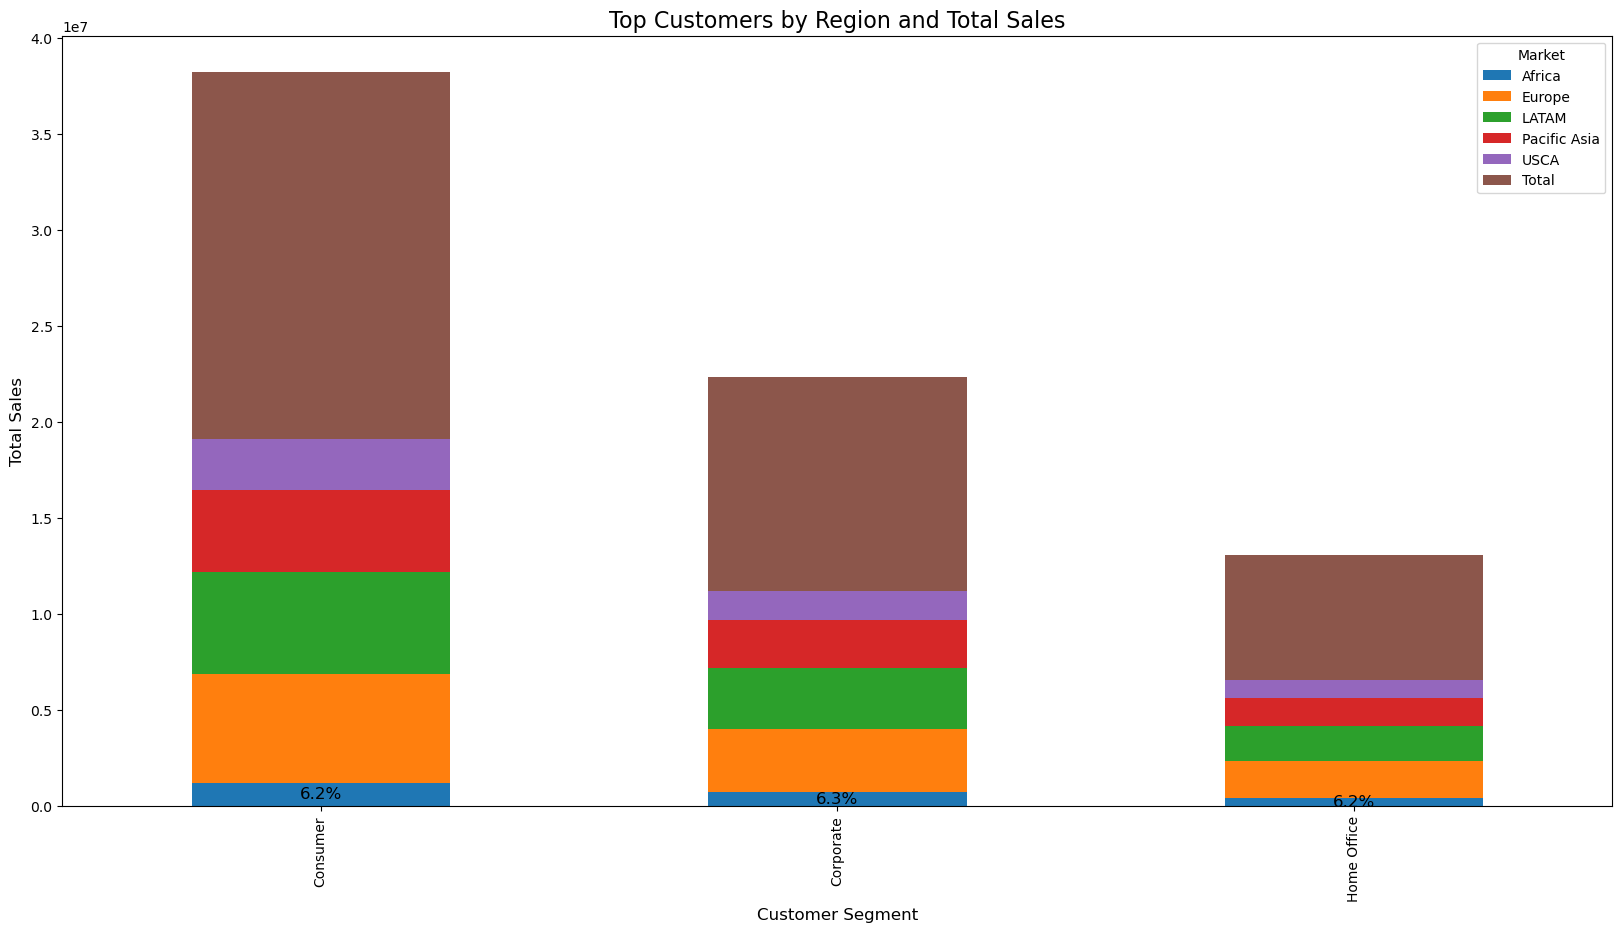

In [14]:
# Create pivot table to calculate total sales for each customer by region
customer_region = pd.pivot_table(df, values='Sales', index='Customer Segment', columns='Market', aggfunc='sum')

# Sort pivot table in descending order by total sales across all regions and select top 10
customer_region['Total'] = customer_region.sum(axis=1)
customer_region = customer_region.sort_values(by='Total', ascending=False).head(10)

# Plot stacked bar chart with percentage values
ax = customer_region.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Top Customers by Region and Total Sales', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Add percentage values to stacked bar chart
totals = customer_region['Total']
for i, patch in enumerate(ax.patches):
    # Calculate x and y coordinates of percentage value
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    
    # Add percentage value if index is less than length of totals
    if i < len(totals):
        percentage = '{:.1f}%'.format(patch.get_height() / totals[i] * 100)
        ax.text(x, y, percentage, ha='center', va='center', fontsize=12)

plt.show()



**Customer Analysis based on benefit and profit 

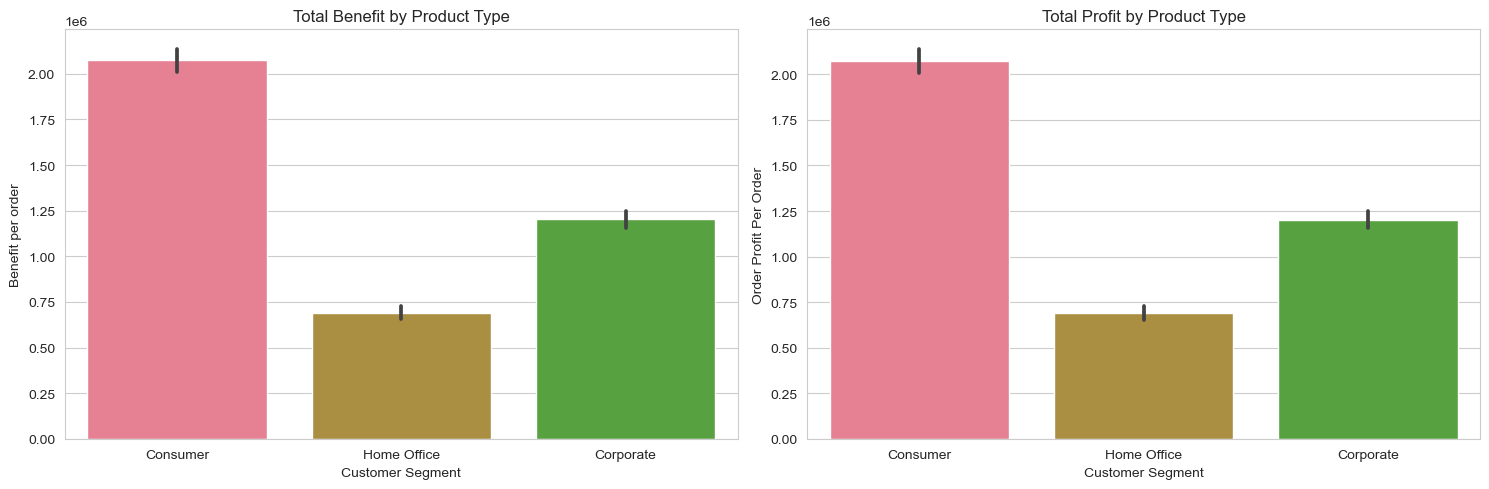

In [15]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('husl')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(data=df, x='Customer Segment', y='Benefit per order', estimator=sum, ax=axes[0])
sns.barplot(data=df, x='Customer Segment', y='Order Profit Per Order', estimator=sum, ax=axes[1])

axes[0].set_title('Total Benefit by Product Type')
axes[1].set_title('Total Profit by Product Type')

plt.tight_layout()
plt.show()

**Fraud orders analysis:

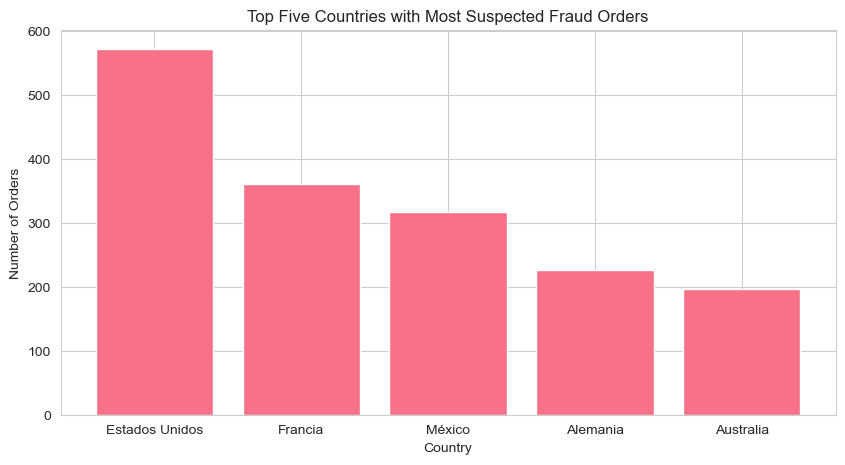

In [17]:
suspected_orders = df[df['Order Status'] == 'SUSPECTED_FRAUD']
top_suspected_countries = suspected_orders['Order Country'].value_counts().nlargest(5)
plt.figure(figsize=(10, 5))
plt.bar(top_suspected_countries.index,top_suspected_countries.values)
plt.title('Top Five Countries with Most Suspected Fraud Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.show()

In [19]:
df["Shipping Mode"].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

**Comparison of various Shipping options

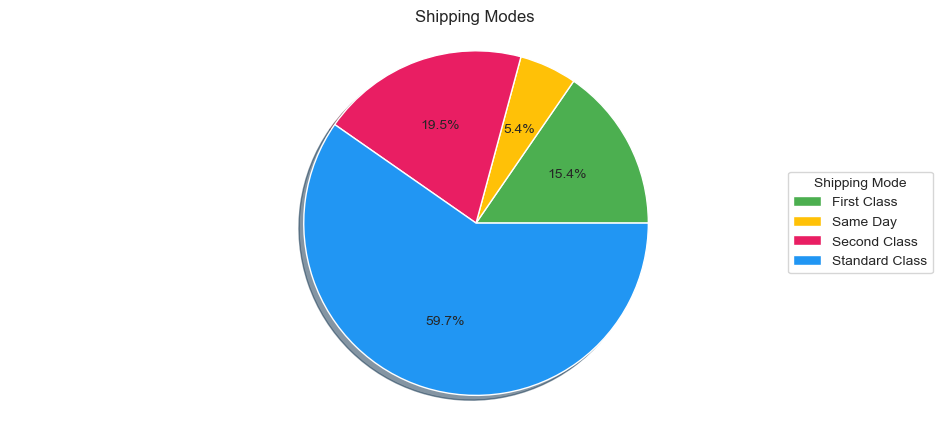

In [18]:
colors = ["#4CAF50", "#FFC107", "#E91E63", "#2196F3"]

total = df.groupby("Shipping Mode", as_index=False).agg(count=("Shipping Mode", "count"))

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
x = total["Shipping Mode"]
y = total["count"]
ax1.pie(y, autopct='%1.1f%%', shadow=True, colors=colors)
ax1.axis('equal')
ax1.set_title('Shipping Modes')

ax1.legend(labels=x, loc='center right', bbox_to_anchor=(1, 0.5), ncol=1, fontsize='medium', title="Shipping Mode", title_fontsize='medium')
plt.show()


**Market-based analysis of delayed shipments

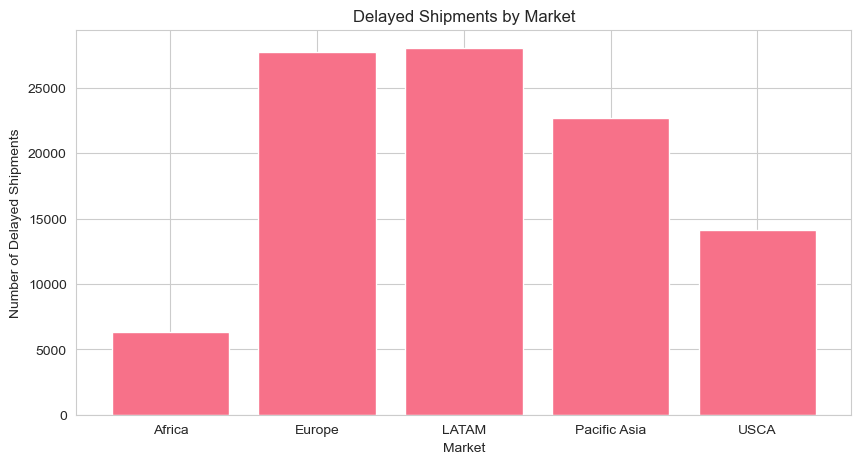

In [22]:
delayed= df[df['Late_delivery_risk'] == "Late Delivery"]
condition1 = delayed.groupby('Market').size().reset_index(name='Count')
condition2 = delayed.groupby('Department Name').size().reset_index(name='Count')

# plot the delayed shipments by country
plt.figure(figsize=(10,5))
plt.bar(condition1['Market'], condition1['Count'])
plt.title('Delayed Shipments by Market')
plt.xlabel('Market')
plt.ylabel('Number of Delayed Shipments')
plt.show()


In [ ]:
df["Customer Segment"]

**An analysis of late deliveries in multiple years

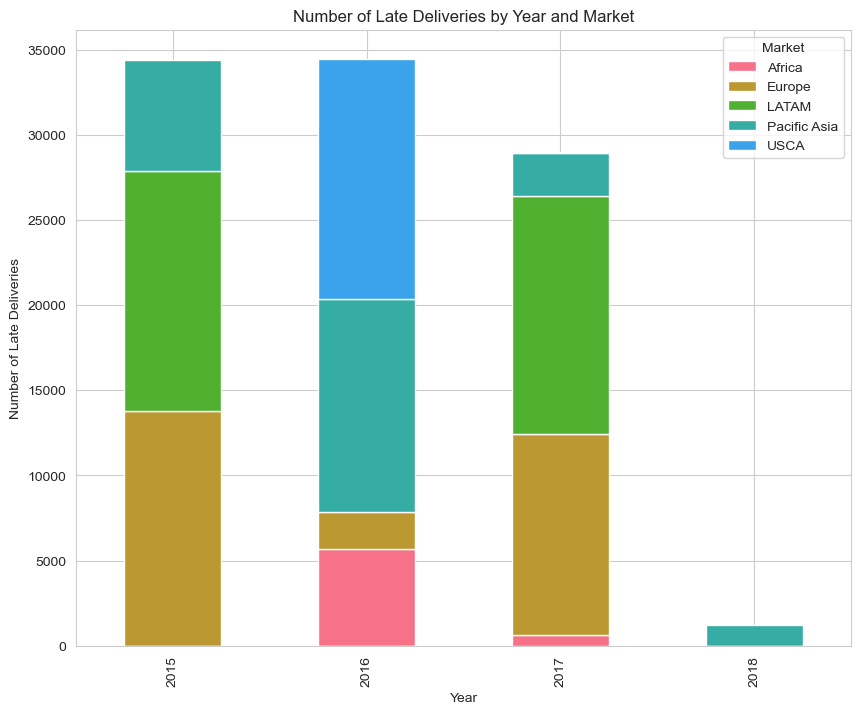

In [33]:
# Filter the data to include only late deliveries
late_deliveries = df[df['Delivery Status'] == 'Late delivery']

# Group the data by year and market and count the number of late deliveries
late_deliveries_by_year_and_market = pd.pivot_table(late_deliveries, index='year', columns='Market', values='Delivery Status', aggfunc='count')

# Create a stacked bar chart
ax = late_deliveries_by_year_and_market.plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Number of Late Deliveries by Year and Market')
plt.xlabel('Year')
plt.ylabel('Number of Late Deliveries')
plt.legend(title='Market', bbox_to_anchor=(1, 1))
plt.show()

**Customer Segment Analyze of Delayed Shipments

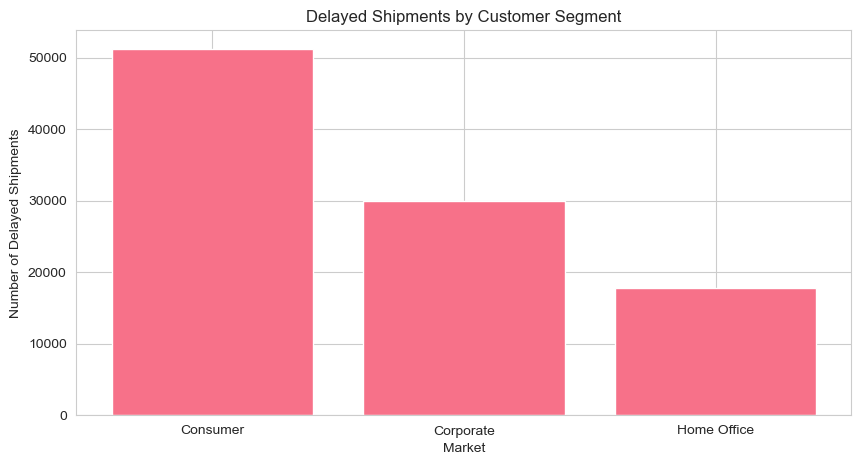

In [23]:
delayed = df[df['Late_delivery_risk'] == "Late Delivery"]
condition1 = delayed.groupby('Customer Segment').size().reset_index(name='Count')
condition2 = delayed.groupby('Department Name').size().reset_index(name='Count')

# plot the delayed shipments by country
plt.figure(figsize=(10,5))
plt.bar(condition1['Customer Segment'], condition1['Count'])
plt.title('Delayed Shipments by Customer Segment')
plt.xlabel('Market')
plt.ylabel('Number of Delayed Shipments')
plt.show()

**Analyze of Delays in Shipments Based on Department

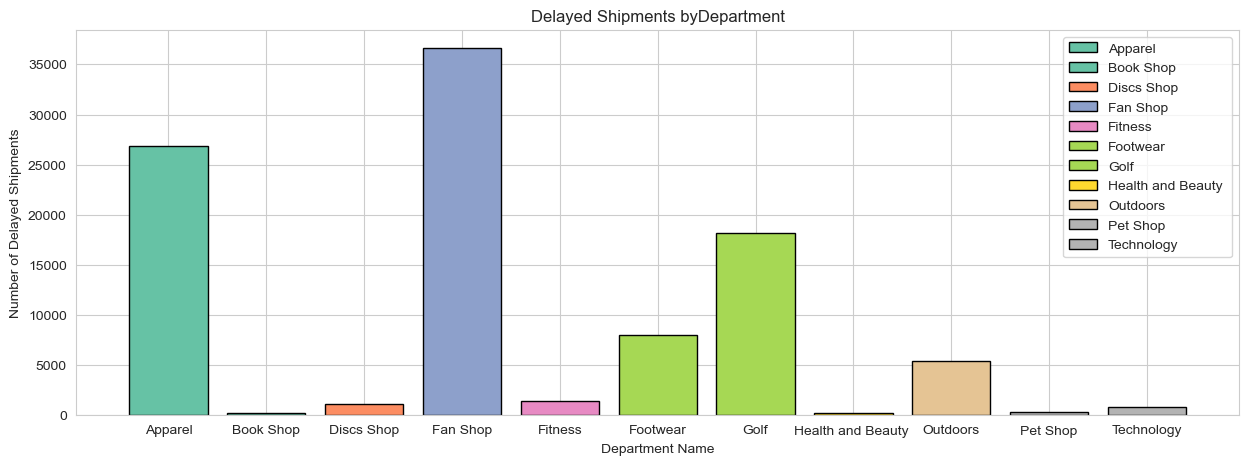

In [24]:
colors = plt.cm.Set2(np.linspace(0, 1, len(delayed_shipments_by_goods)))

# plot the delayed shipments by goods
plt.figure(figsize=(15,5))
plt.bar(condition2['Department Name'], condition2['Count'], color=colors, edgecolor='black')
plt.title('Delayed Shipments byDepartment')
plt.xlabel('Department Name')
plt.ylabel('Number of Delayed Shipments')

# add legend
handles = [plt.Rectangle((0,0),1,1, color=c, ec='black') for c in colors]
labels = condition2['Department Name'].values
plt.legend(handles, labels, loc='best')

plt.show()

**Based on the departments, different markets took longer to deliver the order:

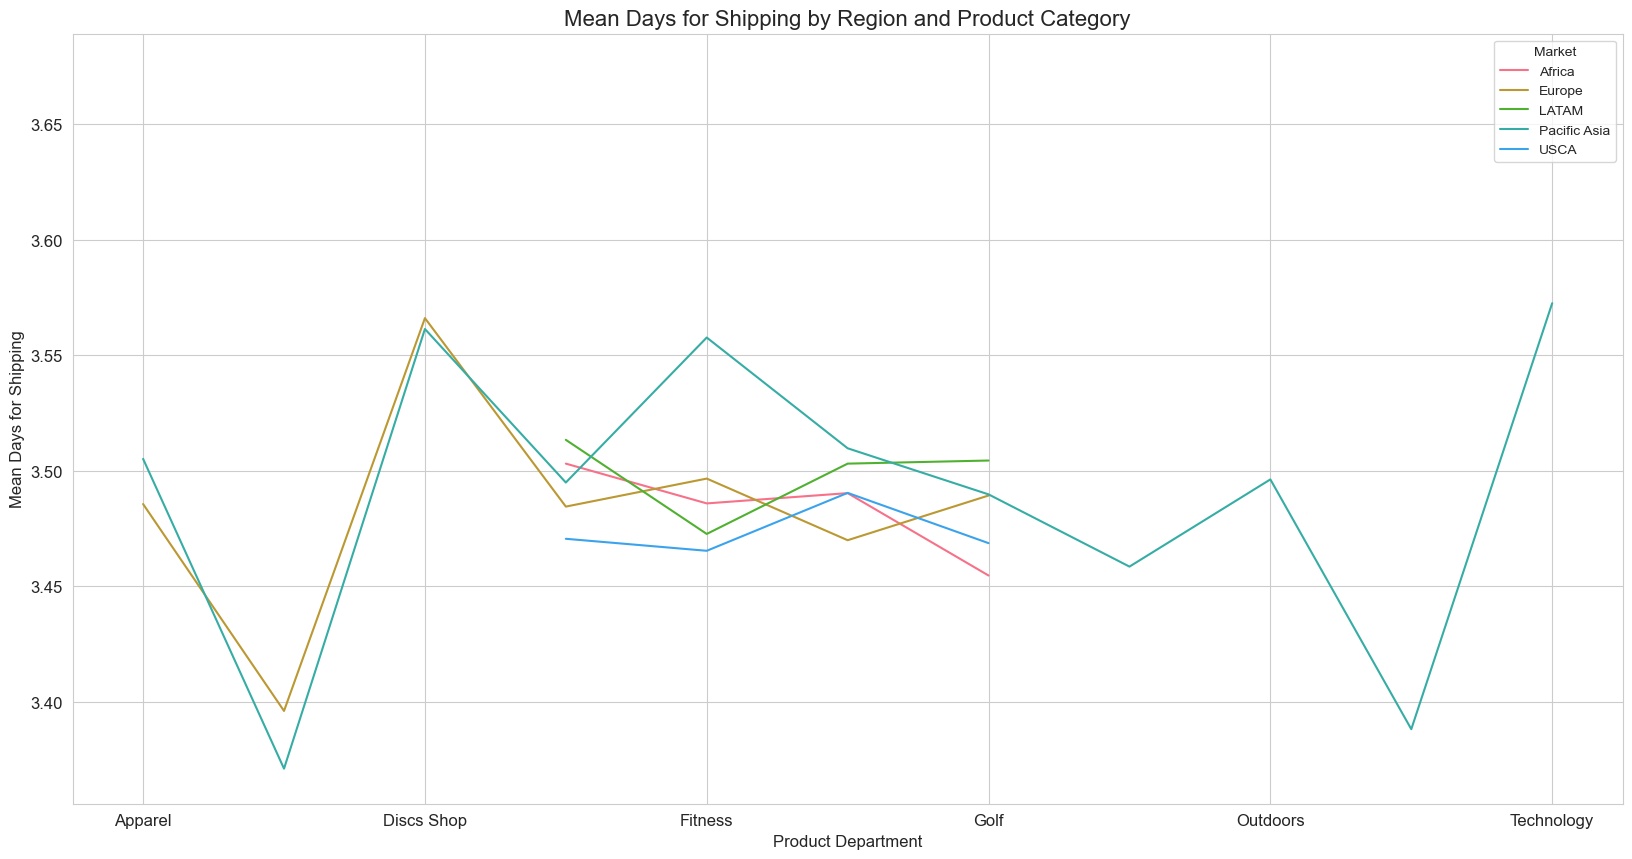

In [30]:
delivery_data = df[['Market', 'Days for shipping (real)', 'Department Name']]

# Group the data by region and category, and calculate the mean days for shipping
region_category_means = delivery_data.groupby(['Market', 'Department Name']).mean().reset_index()

# Pivot the data to create a matrix of mean days for shipping by region and category
pivot_table = region_category_means.pivot(index='Department Name', columns='Market', values='Days for shipping (real)')

# Create a bar plot of the mean days for shipping by region and category
ax = pivot_table.plot(kind='line', figsize=(20, 10), fontsize=12)

# Set the title and axis labels
ax.set_title('Mean Days for Shipping by Region and Product Category', fontsize=16)
ax.set_xlabel('Product Department', fontsize=12)
ax.set_ylabel('Mean Days for Shipping', fontsize=12)

# Show the plot
plt.show()